In [1]:
!pip install numpy==1.25.2
!pip install bnlearn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import bnlearn as bn

import warnings
warnings.filterwarnings("ignore")

In [2]:
print(bn.__version__)

0.8.2


In [3]:
train = pd.read_csv('dataset.csv')

train['Passenger ID'] = train.index

# Atau, tambahkan kolom "Passenger ID" dengan nilai unik (misalnya, nomor urut)
train['Passenger ID'] = range(1, len(train) + 1)

cols = list(train.columns)
cols = ['Passenger ID'] + [col for col in cols if col != 'Passenger ID']
train = train[cols]

train.set_index('Passenger ID', inplace=True)

# Tampilkan trainFrame
train

,Nama Wisata,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,...,Aktivitas Wisata,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,Tunjungan Plaza,1,1,1,1,1,1,1,1,1,...,"Makan Bersama, Berolahraga, Mengambil Foto, Be...",1,1,0,0,1,1,0,0,1
2,Tunjungan Plaza,1,1,1,1,1,1,1,0,0,...,"Makan Bersama, Mengambil Foto, Beribadah, Berb...",1,0,0,0,1,1,0,0,1
3,Tunjungan Plaza,1,0,1,1,1,1,1,0,0,...,"Makan Bersama, Belajar, Mengambil Foto, Berbel...",1,0,1,0,1,0,0,0,1
4,Tunjungan Plaza,1,1,1,1,0,0,1,1,1,...,"Makan Bersama, Mengambil Foto, Berbelanja",1,0,0,0,1,0,0,0,1
5,Tunjungan Plaza,1,1,1,1,0,1,1,0,0,...,"Makan Bersama, Berolahraga, Mengambil Foto, Be...",1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,Balai Pemuda Alun - Alun Surabaya,1,0,1,1,0,1,1,1,0,...,"Berolahraga, Belajar, Mengambil Foto",0,1,1,0,1,0,0,0,0
1347,Balai Pemuda Alun - Alun Surabaya,1,1,1,1,0,1,1,1,1,...,"Berolahraga, Belajar, Mengambil Foto",0,1,1,0,1,0,0,0,0
1348,Balai Pemuda Alun - Alun Surabaya,1,1,1,0,1,1,1,1,1,...,"Makan, Berolahraga, Belajar, Mengambil Foto, M...",1,1,1,0,1,0,0,1,1


In [4]:
train.describe()

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,...,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,0.893333,0.836296,0.754815,0.860000,0.408148,0.866667,0.585185,0.768889,0.562222,0.585926,...,0.520000,0.497037,0.257037,0.417037,0.059259,0.684444,0.178519,0.027407,0.318519,0.378519
std,0.308803,0.370144,0.430356,0.347116,0.491673,0.340061,0.492873,0.421700,0.496297,0.492744,...,0.499785,0.500177,0.437162,0.493252,0.236197,0.464909,0.383091,0.163328,0.466074,0.485198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
drop_list = ['Aktivitas Wisata']

train = train.drop(columns=drop_list)




In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 1 to 1350
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Nama Wisata                  1350 non-null   object
 1   Escape                       1350 non-null   int64 
 2   Relaxation                   1350 non-null   int64 
 3   Play                         1350 non-null   int64 
 4   Strenghthening family bonds  1350 non-null   int64 
 5   Prestige                     1350 non-null   int64 
 6   Social Interaction           1350 non-null   int64 
 7   Romance                      1350 non-null   int64 
 8   Educational Opportunity      1350 non-null   int64 
 9   Self-fulfilment              1350 non-null   int64 
 10  Wish-fulfiment               1350 non-null   int64 
 11  Lingkungan                   1350 non-null   int64 
 12  Infrastruktur                1350 non-null   int64 
 13  Fasilitas                    1350

In [7]:
# Data preparing
dfhot_train, dfnum_train = bn.df2onehot(train)



[df2onehot] >Auto detecting dtypes.


  0%|          | 0/24 [00:00<?, ?it/s]

100%|██████████| 24/24 [00:00<00:00, 119.03it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 24/24 [00:00<00:00, 222.28it/s]

[df2onehot] >Total onehot features: 73


In [8]:
dfnum_train

,Nama Wisata,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
0,27,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,0,0,1
1,27,1,1,1,1,1,1,1,0,0,...,1,1,0,0,0,1,1,0,0,1
2,27,1,0,1,1,1,1,1,0,0,...,1,1,0,1,0,1,0,0,0,1
3,27,1,1,1,1,0,0,1,1,1,...,1,1,0,0,0,1,0,0,0,1
4,27,1,1,1,1,0,1,1,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1,1,0,1,1,0,1,1,1,0,...,0,0,1,1,0,1,0,0,0,0
1346,1,1,1,1,1,0,1,1,1,1,...,0,0,1,1,0,1,0,0,0,0
1347,1,1,1,1,0,1,1,1,1,1,...,0,1,1,1,0,1,0,0,1,1
1348,1,1,1,1,1,0,1,1,1,1,...,0,1,1,0,0,1,0,0,1,1


In [9]:
dfnum_target = dfnum_train['Nama Wisata']

In [10]:
params_static = {
    'figsize': (15, 10),
    'width': 20,  # Menyesuaikan lebar panah
    'edge_alpha': 0.5,  # Menyesuaikan kejelasan panah
    'arrowstyle': '-|>',  # Gaya panah (ubah sesuai kebutuhan)
    'arrowsize': 20,  # Ukuran panah
    'minscale': 5,
    'maxscale': 15,
    'layout': 'spring_layout',
    'font_size': 14,
    'font_family': 'sans-serif',
    'alpha': 0.8,
    'node_shape': 'o',
    'font_color': '#000000',
    'facecolor': 'white',
    'visible': True
}

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


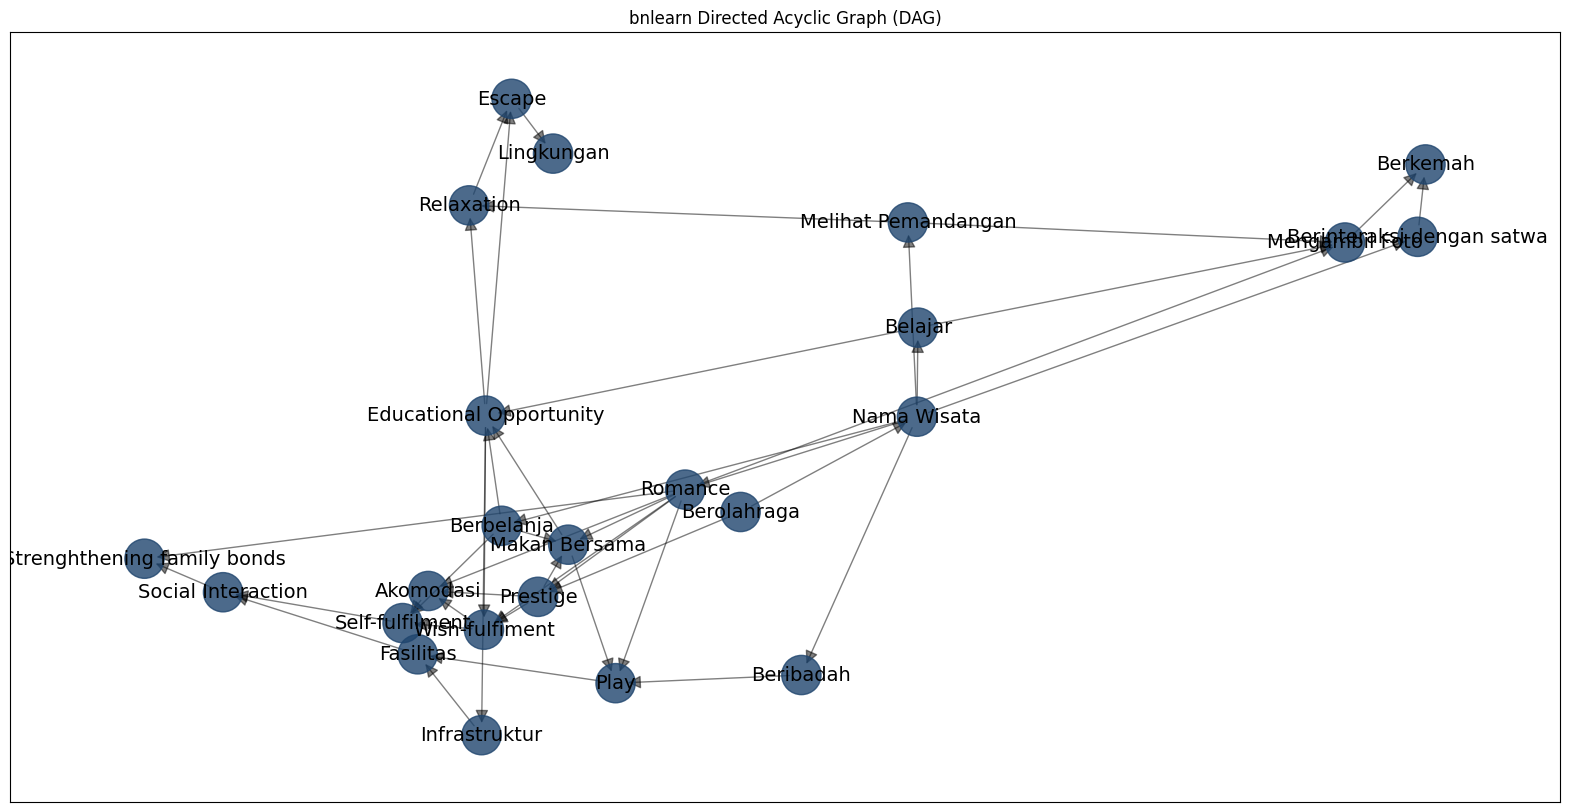

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Nama Wisata:
+-----------------+----------------------+----------------------+
| Berolahraga     | Berolahraga(0)       | Berolahraga(1)       |
+-----------------+----------------------+----------------------+
| Nama Wisata(1)  | 0.017643724895887246 | 0.07145043508679873  |
+-----------------+----------------------+----------------------+
| Nama Wisata(2)  | 0.04159582070427049  | 0.028947483492938044 |
+-----------------+----------------------+----------------------+
| Nama Wisata(3)  | 0.039599812720238554 | 0.03248939612575977  |
+-----------------+----------------------+----------------------+
| Nama Wisata(4)  | 0.03893447672556124  | 0.033670033670033676 |
+-----------------+----------------------+----------------------+
| Nama Wisata(5)  | 0.03826914073088393  | 0.0348

['model.pkl']

In [11]:
# model 2
import joblib
# Structure learning
DAG = bn.structure_learning.fit(dfnum_train, methodtype='hc', root_node='Nama Wisata', bw_list_method='nodes', verbose=3)

# Plot
G = bn.plot(DAG, interactive=False, params_static=params_static)

# Parameter learning
model = bn.parameter_learning.fit(DAG, dfnum_train, verbose=3);

joblib.dump(model, 'model.pkl')

In [12]:
# Print model
# bn.print_CPD(model)

In [13]:
DAG['adjmat']

# print
print(DAG['adjmat'])

target                       Nama Wisata  Escape  Relaxation   Play  \
source                                                                
Nama Wisata                        False   False       False  False   
Escape                             False   False       False  False   
Relaxation                         False    True       False  False   
Play                               False   False       False  False   
Strenghthening family bonds        False   False       False  False   
Prestige                           False   False       False  False   
Social Interaction                 False   False       False  False   
Romance                            False   False       False   True   
Educational Opportunity            False    True        True  False   
Self-fulfilment                    False   False       False  False   
Wish-fulfiment                     False   False       False  False   
Lingkungan                         False   False       False  False   
Infras

In [14]:
vector = bn.adjmat2vec(DAG['adjmat'])

print(vector)

                       source                       target  weight
0                 Nama Wisata                      Romance    True
1                 Nama Wisata                      Belajar    True
2                 Nama Wisata    Berinteraksi dengan satwa    True
3                 Nama Wisata                    Beribadah    True
4                 Nama Wisata          Melihat Pemandangan    True
5                 Nama Wisata                   Berbelanja    True
6                      Escape                   Lingkungan    True
7                  Relaxation                       Escape    True
8                        Play                    Fasilitas    True
9                    Prestige               Wish-fulfiment    True
10                   Prestige                    Akomodasi    True
11                   Prestige                Makan Bersama    True
12         Social Interaction  Strenghthening family bonds    True
13                    Romance                         Play    

In [15]:
# buat evidence seperti ini 
# Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,Lingkungan,Infrastruktur,Fasilitas,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
# 1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,0,1

evidence = {
    'Escape': 1,
    'Relaxation': 1,
    'Play': 1,
    'Strenghthening family bonds': 1,
    'Prestige': 0,
    'Social Interaction': 1,
    'Romance': 0,
    'Educational Opportunity': 0,
    'Self-fulfilment': 1,
    'Wish-fulfiment': 0,
    'Lingkungan': 1,
    'Infrastruktur': 0,
    'Fasilitas': 1,
    'Akomodasi': 1,
    'Makan Bersama': 1,
    'Berolahraga': 0,
    'Belajar': 0,
    'Berinteraksi dengan satwa': 0,
    'Mengambil Foto': 1,
    'Beribadah': 0,
    'Berkemah': 0,
    'Melihat Pemandangan': 0,
    'Berbelanja': 1
}
evidence

{'Escape': 1,
 'Relaxation': 1,
 'Play': 1,
 'Strenghthening family bonds': 1,
 'Prestige': 0,
 'Social Interaction': 1,
 'Romance': 0,
 'Educational Opportunity': 0,
 'Self-fulfilment': 1,
 'Wish-fulfiment': 0,
 'Lingkungan': 1,
 'Infrastruktur': 0,
 'Fasilitas': 1,
 'Akomodasi': 1,
 'Makan Bersama': 1,
 'Berolahraga': 0,
 'Belajar': 0,
 'Berinteraksi dengan satwa': 0,
 'Mengambil Foto': 1,
 'Beribadah': 0,
 'Berkemah': 0,
 'Melihat Pemandangan': 0,
 'Berbelanja': 1}

In [16]:
query = bn.inference.fit(model, variables=['Nama Wisata'], evidence=evidence, verbose=3)
query.df


[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------------+------------+
|    |   Nama Wisata |          p |
+====+===============+============+
|  0 |             1 | 0.00896446 |
+----+---------------+------------+
|  1 |             2 | 0.0736998  |
+----+---------------+------------+
|  2 |             3 | 0.0216888  |
+----+---------------+------------+
|  3 |             4 | 0.0476504  |
+----+---------------+------------+
|  4 |             5 | 0.0391992  |
+----+---------------+------------+
|  5 |             6 | 0.0392221  |
+----+---------------+------------+
|  6 |             7 | 0.0119844  |
+----+---------------+------------+
|  7 |             8 | 0.0111677  |
+----+---------------+------------+
|  8 |             9 | 0.0106744  |
+----+---------------+------------+
|  9 |            10 | 0.0476128  |
+----+---------------+------------+
| 10 |            11 | 0.0695222  |


,Nama Wisata,p
0,1,0.008964
1,2,0.073700
2,3,0.021689
3,4,0.047650
4,5,0.039199
5,6,0.039222
6,7,0.011984
7,8,0.011168
8,9,0.010674
9,10,0.047613


In [17]:
# change Nama Wisata dari angka ke nama

query.df['Nama Wisata'] = {
    0: "Balai Pemuda Alun - Alun Surabaya",
    1: "Galaxy Mall Surabaya",
    2: "House of Sampoerna",
    3: "Jalan Tunjungan",
    4: "Jatim International Expo (JIE) Convention Exhibiton",
    5: "Kampung Lawas Maspati",
    6: "Kampung Pecinaan Kapasan Dalam",
    7: "Kebun Binatang Surabaya",
    8: "Kebun Raya Mangrove Gunung Anyar",
    9: "Kodam Street Food Surabaya",
    10: "Kuliner Pecinan Kembang Jepun",
    11: "Makam Sunan Ampel",
    12: "Masjid Cheng Ho",
    13: "Masjid Nasional Al Akbar",
    14: "Mirota Batik & Handicraft",
    15: "Monumen Tugu Pahlawan",
    16: "Monumen Kapal Selam",
    17: "Museum Pendidikan Surabaya",
    18: "Museum Surabaya Gedung Siola",
    19: "Pasar Genteng",
    20: "Pasar Pabean",
    21: "Pusat Olahraga KONI",
    22: "Stadion Gelora Bung Tomo",
    23: "Surabaya Convention Center",
    24: "Taman Bungkul",
    25: "Taman Suroboyo",
    26: "Tunjungan Plaza"
}

query.df = query.df.sort_values(by='p', ascending=False)
query.df

,Nama Wisata,p
19,Pasar Genteng,0.220591
20,Pasar Pabean,0.130249
1,Galaxy Mall Surabaya,0.073700
10,Kuliner Pecinan Kembang Jepun,0.069522
26,Tunjungan Plaza,0.052496
3,Jalan Tunjungan,0.047650
9,Kodam Street Food Surabaya,0.047613
14,Mirota Batik & Handicraft,0.044844
5,Kampung Lawas Maspati,0.039222
4,Jatim International Expo (JIE) Convention Exhi...,0.039199
